In [ ]:
sfrom google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Crop

In [ ]:
import random
import os
import numpy as np
import torch
import torch.utils.data
import shutil

In [ ]:
test_Fudan = random.sample(range(0, 74), 17)
test_Penn = random.sample(range(0,96),17)

In [ ]:
source = "/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPed/PNGImages"
des_train = "/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Images/Train"
des_test = "/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Images/Test"
source_masks = "/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPed/PedMasks"
des_train_masks = "/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Masks/Train"
des_test_masks = "/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Masks/Test"
for filename in os.listdir(source):
  num = int(filename.split('.')[0][-3:]);
  filenameMask = filename.split('.')[0]+'_mask.png'
  if filename.split('.')[0][:8] == "FudanPed":
    if(num in test_Fudan):
      source_image_path = os.path.join(source,filename)
      destination_image_path = os.path.join(des_test,filename)
      shutil.copyfile(source_image_path, destination_image_path)

      source_mask_path = os.path.join(source_masks,filenameMask)
      destination_mask_path = os.path.join(des_test_masks,filenameMask)
      shutil.copyfile(source_mask_path, destination_mask_path)
    else:
      source_image_path = os.path.join(source,filename)
      destination_image_path = os.path.join(des_train,filename)
      shutil.copyfile(source_image_path, destination_image_path)

      source_mask_path = os.path.join(source_masks,filenameMask)
      destination_mask_path = os.path.join(des_train_masks,filenameMask)
      shutil.copyfile(source_mask_path, destination_mask_path)
  else:
    if(num in test_Penn):
      source_image_path = os.path.join(source,filename)
      destination_image_path = os.path.join(des_test,filename)
      shutil.copyfile(source_image_path, destination_image_path)

      source_mask_path = os.path.join(source_masks,filenameMask)
      destination_mask_path = os.path.join(des_test_masks,filenameMask)
      shutil.copyfile(source_mask_path, destination_mask_path)
    else:
      source_image_path = os.path.join(source,filename)
      destination_image_path = os.path.join(des_train,filename)
      shutil.copyfile(source_image_path, destination_image_path)

      source_mask_path = os.path.join(source_masks,filenameMask)
      destination_mask_path = os.path.join(des_train_masks,filenameMask)
      shutil.copyfile(source_mask_path, destination_mask_path)

In [ ]:
for namefolder in os.listdir("/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom"):
  print(namefolder)

Images
.ipynb_checkpoints
Masks


Crop images for train SVM

In [ ]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image

PedMasks = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Masks/Train'
bboxes = []
for filename in os.listdir(PedMasks):
  bbox = {}
  bbox['id'] = filename
  mask_path = os.path.join(PedMasks, filename)
  mask = Image.open(mask_path)
  mask = np.array(mask)
  # instances are encoded as different colors
  obj_ids = np.unique(mask)
  # first id is the background, so remove it
  obj_ids = obj_ids[1:]

  # split the color-encoded mask into a set
  # of binary masks
  masks = mask == obj_ids[:, None, None]

  # get bounding box coordinates for each mask
  num_objs = len(obj_ids)
  boxes = []
  for i in range(num_objs):
    pos = np.where(masks[i])
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])
    boxes.append([xmin, ymin, xmax, ymax])
  bbox['boxes'] = boxes
  bboxes.append(bbox)

crop image with pedestrians

In [ ]:
ImagePath = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Images/Train'
Pedestrian = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Images/Dataset_SVM/Pedestrians'
for item in bboxes:
  id = item['id'].split('_')[0]
  image = Image.open(os.path.join(ImagePath,id + '.png'))
  for idx,i in enumerate(item['boxes']):
    img_crop = image.crop(i)
    img_crop.save(os.path.join(Pedestrian,id + '_'+ str(idx) +'.png'))

In [ ]:
count = 0
for item in os.listdir(Pedestrian):
  count+=1
print("N.o Pedestrians dataset: ",count)

N.o Pedestrians dataset:  325


crop image with non-pedestrians

In [ ]:
def check_intersection(bbox,bboxes):
  for item in bboxes:
    x1_1, y1_1, x2_1, y2_1 = bbox
    x1_2, y1_2, width2, height2 = item
    x2_2 = x1_2 + width2
    y2_2 = y1_2 + height2
    if (x2_1 < x1_2 or x1_1 > x2_2 or y2_1 < y1_2 or y1_1 > y2_2):
      continue
    else:
        return False
  return True

In [ ]:
NonPedestrian = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Images/Dataset_SVM/NonPedestrians'
for file_name in os.listdir(NonPedestrian):
    file_path = os.path.join(NonPedestrian, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)

In [ ]:
ImagePath = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Images/Train'
NonPedestrian = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPedCustom/Images/Dataset_SVM/NonPedestrians'
quantity = 0
for item in bboxes:
  id = item['id'].split('_')[0]
  image = Image.open(os.path.join(ImagePath,id + '.png'))
  size = image.size
  x = 0
  y = 0
  width = 100
  height = 200
  bbox = [x, y, width, height]
  count = 0
  print('-----------------',item,'-----------------')
  print("size of image: ",size[0],size[1])
  while(x < size[0]-width):
    while(y < size[1]-height):
      bbox = [x, y, x + width,y + height]
      if check_intersection(bbox,item['boxes']):
        quantity += 1
        img_crop = image.crop(bbox)
        img_crop.save(os.path.join(NonPedestrian,id + '_'+ str(count) +'.jpg'))
        count +=1
        y = y + height
      else:
        y = y + 10
    x = x + 20
    y = 0
print("quantity: ",quantity)

----------------- {'id': 'PennPed00003_mask.png', 'boxes': [[7, 32, 173, 364], [451, 63, 530, 352], [530, 90, 660, 380]]} -----------------
size of image:  670 418
----------------- {'id': 'PennPed00002_mask.png', 'boxes': [[8, 83, 96, 303], [82, 44, 164, 297], [267, 83, 369, 297], [362, 32, 515, 334], [575, 74, 712, 361], [516, 91, 607, 299]]} -----------------
size of image:  745 378
----------------- {'id': 'PennPed00004_mask.png', 'boxes': [[66, 60, 169, 409], [154, 90, 252, 384], [227, 93, 324, 390], [416, 100, 515, 390], [594, 111, 733, 396]]} -----------------
size of image:  786 436
----------------- {'id': 'PennPed00006_mask.png', 'boxes': [[110, 71, 198, 411], [230, 95, 328, 387], [442, 107, 607, 434], [2, 101, 68, 396]]} -----------------
size of image:  631 436
----------------- {'id': 'PennPed00007_mask.png', 'boxes': [[41, 59, 164, 349], [126, 82, 200, 358], [186, 75, 308, 368], [298, 75, 380, 399], [425, 67, 526, 342]]} -----------------
size of image:  570 412
---------

# Old Crop

In [ ]:
import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image

PedMasks = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPed/PedMasks'
bboxes = []
for filename in os.listdir(PedMasks):
  bbox = {}
  bbox['id'] = filename
  mask_path = os.path.join(PedMasks, filename)
  mask = Image.open(mask_path)
  mask = np.array(mask)
  # instances are encoded as different colors
  obj_ids = np.unique(mask)
  # first id is the background, so remove it
  obj_ids = obj_ids[1:]

  # split the color-encoded mask into a set
  # of binary masks
  masks = mask == obj_ids[:, None, None]

  # get bounding box coordinates for each mask
  num_objs = len(obj_ids)
  boxes = []
  for i in range(num_objs):
    pos = np.where(masks[i])
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])
    boxes.append([xmin, ymin, xmax, ymax])
  bbox['boxes'] = boxes
  bboxes.append(bbox)

Crop image pedestrian

In [ ]:
x = 0
y = 0
count = 0
for filename in os.listdir('/content/drive/MyDrive/CS231_CV_finalProject/dataset/Crop/Pedestrian'):
  img = Image.open(os.path.join('/content/drive/MyDrive/CS231_CV_finalProject/dataset/Crop/Pedestrian',filename))
  x += img.size[0]
  y += img.size[1]
  count +=1
print(x/count)
print(y/count)

ZeroDivisionError: ignored

In [ ]:
ImagePath = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPed/PNGImages'
Pedestrian = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/Crop/Pedestrian'
for item in bboxes:
  id = item['id'].split('_')[0]
  image = Image.open(os.path.join(ImagePath,id + '.png'))
  for idx,i in enumerate(item['boxes']):
    img_crop = image.crop(i)
    img_crop.save(os.path.join(Pedestrian,id + '_'+ str(idx) +'.png'))

crop image without pedestrian

In [ ]:
init_box = [0,0,100,200]

In [ ]:
def check_intersection(bbox,bboxes):
  for item in bboxes:
    x1_1, y1_1, x2_1, y2_1 = bbox
    x1_2, y1_2, width2, height2 = item
    x2_2 = x1_2 + width2
    y2_2 = y1_2 + height2
    if (x2_1 < x1_2 or x1_1 > x2_2 or y2_1 < y1_2 or y1_1 > y2_2):
        continue
    else:
        return False
  return True

In [ ]:
ImagePath = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPed/PNGImages'
NonPedestrian = '/content/drive/MyDrive/CS231_CV_finalProject/dataset/Crop/NonPedestrian'
quantity = 0
for item in bboxes:
  id = item['id'].split('_')[0]
  image = Image.open(os.path.join(ImagePath,id + '.png'))
  size = image.size
  x = 0
  y = 0
  width = 100
  height = 200
  bbox = [x, y, width, height]
  count = 0
  print('-----------------',item,'-----------------')
  while(x < size[0]-width):
    while(y < size[1]-height):
      bbox = [x, y, x + width,y + height]
      if check_intersection(bbox,item['boxes']):
        quantity += 1
        img_crop = image.crop(bbox)
        img_crop.save(os.path.join(NonPedestrian,id + '_'+ str(count) +'.jpg'))
        count +=1
        y = y + height
      else:
        y = y + 10
    x = x + 30
    y = 0
print("quantity: ",quantity)

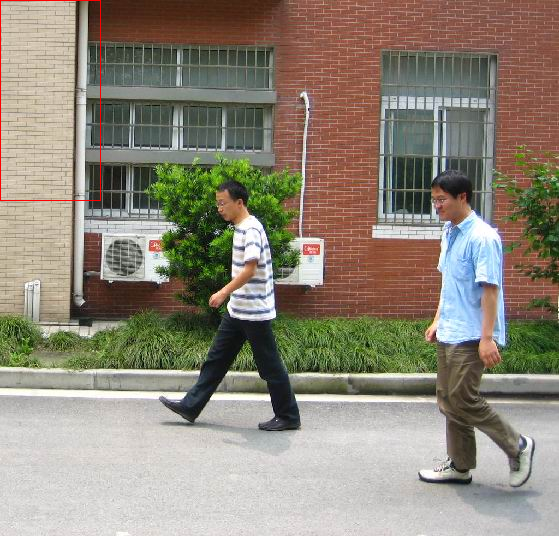

In [ ]:
from PIL import Image, ImageDraw
img = Image.open('/content/drive/MyDrive/CS231_CV_finalProject/dataset/PennFudanPed/PNGImages/FudanPed00001.png')
draw = ImageDraw.Draw(img)
draw.rectangle(init_box,fill=None,outline="red")
img.show()